This demo is based on Mark Richardson's 2009 "Principle Component Analysis" notes and uses data he pulled from DEFRA on 1997 UK food consumption (grams/person/week). This dataset is also used as a nice illustrated example of PCA here:
http://setosa.io/ev/principal-component-analysis/

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')  # prettier plots
import numpy as np

food_data = np.array([[105, 103, 103, 66],
                      [245, 227, 242, 267],
                      [685, 803, 750, 586],
                      [147, 160, 122, 93],
                      [193, 235, 184, 209], 
                      [156, 175, 147, 139],
                      [720, 874, 566, 1033],
                      [253, 265, 171, 143],
                      [488, 570, 418, 355],
                      [198, 203, 220, 187],
                      [360, 365, 337, 334],
                      [1102, 1137, 957, 674],
                      [1472, 1582, 1462, 1494],
                      [57, 73, 53, 47],
                      [1374, 1256, 1572, 1506],
                      [375, 475, 458, 135],
                      [54, 64, 62, 41]])
row_labels = ['Cheese',
              'Carcass meat',
              'Other meat',
              'Fish',
              'Fats and oils',
              'Sugars',
              'Fresh potatoes',
              'Fresh Veg',
              'Other Veg',
              'Processed potatoes',
              'Processed Veg',
              'Fresh fruit',
              'Cereals',
              'Beverages',
              'Soft drinks',
              'Alcoholic drinks',
              'Confectionary']
column_labels = ['England', 'Wales', 'Scotland', 'N Ireland']

first_column_width = 20
other_columns_width = 15

# print header
print("".ljust(first_column_width), end='')
for column_label in column_labels:
    print(column_label.rjust(other_columns_width), end='')
print()

# print each row in the numpy array with a column label
for row_label, row in zip(row_labels, food_data):
    print(row_label.ljust(first_column_width), end='')
    print("".join([("%d" % x).rjust(other_columns_width) for x in row]))

                            England          Wales       Scotland      N Ireland
Cheese                          105            103            103             66
Carcass meat                    245            227            242            267
Other meat                      685            803            750            586
Fish                            147            160            122             93
Fats and oils                   193            235            184            209
Sugars                          156            175            147            139
Fresh potatoes                  720            874            566           1033
Fresh Veg                       253            265            171            143
Other Veg                       488            570            418            355
Processed potatoes              198            203            220            187
Processed Veg                   360            365            337            334
Fresh fruit                 

([<matplotlib.axis.XTick at 0x167fa33ffa0>,
 [Text(0, 0, 'Cheese'),
  Text(1, 0, 'Carcass meat'),
  Text(2, 0, 'Other meat'),
  Text(3, 0, 'Fish'),
  Text(4, 0, 'Fats and oils'),
  Text(5, 0, 'Sugars'),
  Text(6, 0, 'Fresh potatoes'),
  Text(7, 0, 'Fresh Veg'),
  Text(8, 0, 'Other Veg'),
  Text(9, 0, 'Processed potatoes'),
  Text(10, 0, 'Processed Veg'),
  Text(11, 0, 'Fresh fruit'),
  Text(12, 0, 'Cereals'),
  Text(13, 0, 'Beverages'),
  Text(14, 0, 'Soft drinks'),
  Text(15, 0, 'Alcoholic drinks'),
  Text(16, 0, 'Confectionary')])

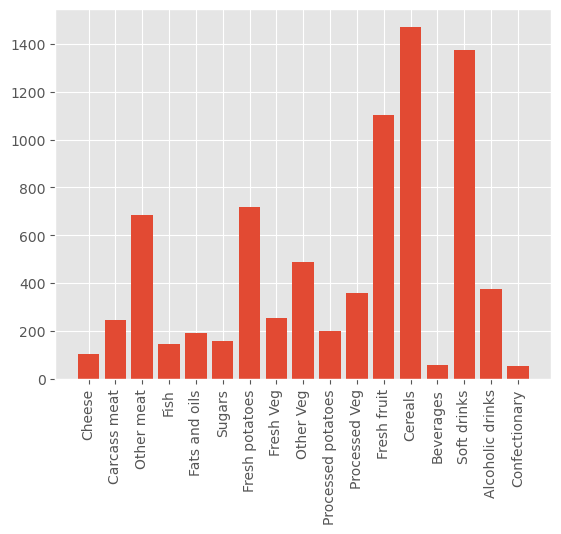

In [2]:
plt.bar(range(len(row_labels)), food_data[:, 0])
plt.xticks(range(len(row_labels)), row_labels, rotation=90)

([<matplotlib.axis.XTick at 0x167fb43d9a0>,
 [Text(0, 0, 'Cheese'),
  Text(1, 0, 'Carcass meat'),
  Text(2, 0, 'Other meat'),
  Text(3, 0, 'Fish'),
  Text(4, 0, 'Fats and oils'),
  Text(5, 0, 'Sugars'),
  Text(6, 0, 'Fresh potatoes'),
  Text(7, 0, 'Fresh Veg'),
  Text(8, 0, 'Other Veg'),
  Text(9, 0, 'Processed potatoes'),
  Text(10, 0, 'Processed Veg'),
  Text(11, 0, 'Fresh fruit'),
  Text(12, 0, 'Cereals'),
  Text(13, 0, 'Beverages'),
  Text(14, 0, 'Soft drinks'),
  Text(15, 0, 'Alcoholic drinks'),
  Text(16, 0, 'Confectionary')])

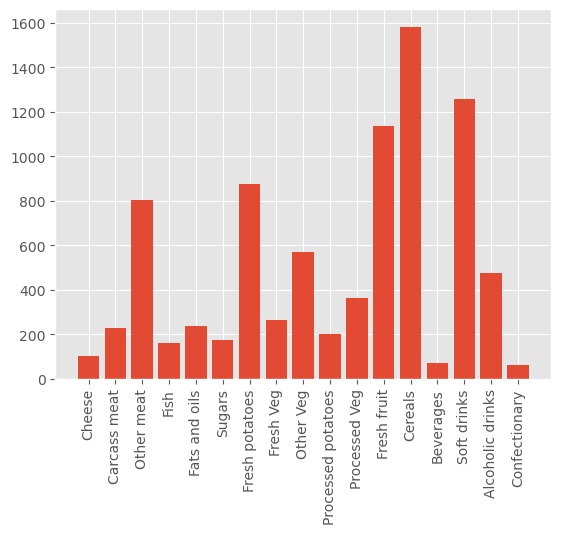

In [3]:
plt.bar(range(len(row_labels)), food_data[:, 1])
plt.xticks(range(len(row_labels)), row_labels, rotation=90)

In [4]:
food_data

array([[ 105,  103,  103,   66],
       [ 245,  227,  242,  267],
       [ 685,  803,  750,  586],
       [ 147,  160,  122,   93],
       [ 193,  235,  184,  209],
       [ 156,  175,  147,  139],
       [ 720,  874,  566, 1033],
       [ 253,  265,  171,  143],
       [ 488,  570,  418,  355],
       [ 198,  203,  220,  187],
       [ 360,  365,  337,  334],
       [1102, 1137,  957,  674],
       [1472, 1582, 1462, 1494],
       [  57,   73,   53,   47],
       [1374, 1256, 1572, 1506],
       [ 375,  475,  458,  135],
       [  54,   64,   62,   41]])

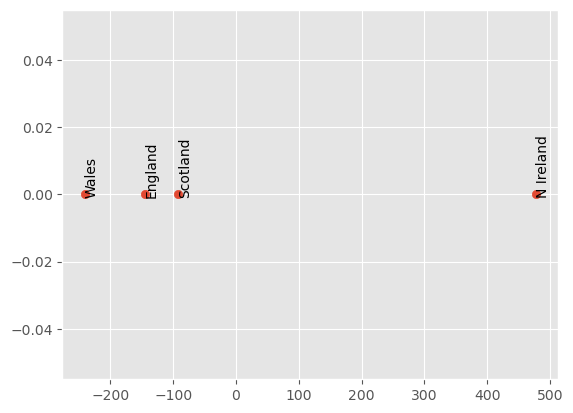

In [5]:
from sklearn.decomposition import PCA

single_dimension_pca = PCA(n_components=1)  # project data down to a single dimension
single_dimension_food_data = single_dimension_pca.fit_transform(food_data.T)

# matplotlib doesn't have a built-in 1D scatter plot but we can
# just use a 2D scatter plot with y-axis values all set to 0
y_axis_all_zeros = np.zeros(len(single_dimension_food_data))

plt.scatter(single_dimension_food_data, y_axis_all_zeros)
for idx in range(len(single_dimension_food_data)):
    plt.annotate(column_labels[idx], (single_dimension_food_data[idx], y_axis_all_zeros[idx]), rotation=90)

In [6]:
single_dimension_pca.explained_variance_ratio_

array([0.67444346])